<a href="https://colab.research.google.com/github/missaixxka/HomeworkPython/blob/main/HWSQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Создание базы данных и таблиц
Создайте базу данных library.db и таблицу books с полями:

id (PRIMARY KEY, AUTOINCREMENT),

title (TEXT, NOT NULL),

author (TEXT, NOT NULL),

year_published (INTEGER),

genre (TEXT).

In [ ]:
import sqlite3

def create_database():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    create_table_query = '''
    CREATE TABLE IF NOT EXISTS books (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            title TEXT NOT NULL,
            author TEXT NOT NULL,
            year_published INTEGER,
            genre TEXT
    );
    '''
    # Выполнение запроса
    cursor.execute(create_table_query)
    # Сохранение изменений
    conn.commit()
    # Закрытие подключения
    conn.close()
    print("База данных и таблица 'books' созданы.")

create_database()

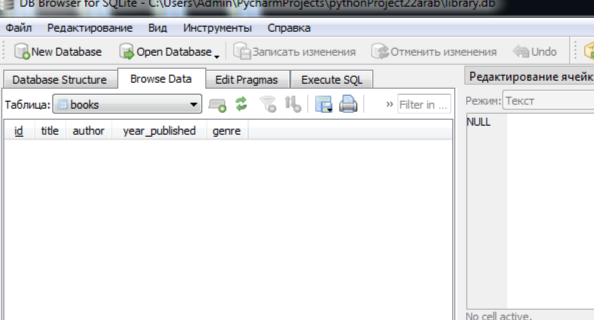

# 2. Вставка данных
Добавьте в таблицу books следующие записи:

"The Great Gatsby", автор: F. Scott Fitzgerald, год: 1925, жанр: Fiction.

"1984", автор: George Orwell, год: 1949, жанр: Dystopian.

"To Kill a Mockingbird", автор: Harper Lee, год: 1960, жанр: Classic.

In [ ]:
import sqlite3
# Вставка данных(множественная)
def insert_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    insert_query = '''
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?);
    '''

    books = [
        ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"),
        ("1984", "George Orwell", 1949, "Dystopian"),
        ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")
    ]

    cursor.executemany(insert_query, books)
    conn.commit()
    conn.close()
    print("Данные добавлены в таблицу 'books'.")

insert_data()

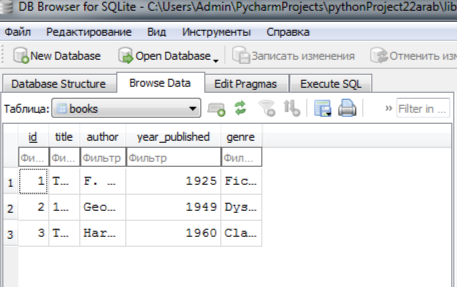

# 3. Выборка всех данных
Напишите запрос, который выбирает все книги из таблицы books.

In [ ]:
import sqlite3

def select_all_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    # *: Выбираются все столбцы таблицы
    select_query = '''
    SELECT * FROM books;
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall() # Метод fetchall() возвращает все строки результата запроса в виде списка кортежей

    print("Данные в таблице books:")
    for row in rows:
        print(row)

    conn.close()

select_all_data()

# 4. Фильтрация данных
Выберите все книги, опубликованные после 1950 года.

In [ ]:
import sqlite3

def filter_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    select_query = '''
    SELECT * FROM books WHERE year_published > 1950;
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall()

    print("\nКниги, опубликованные после 1950 года:")
    for row in rows:
        print(row)

    conn.close()

filter_data()

# 5. Использование оператора LIKE
Найдите все книги, название которых начинается с буквы "T".

In [ ]:
import sqlite3

def use_like():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    select_query = '''
    SELECT * FROM books WHERE title LIKE 'T%';
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall()

    print("\nКниги, название которых начинается с буквы 'T':")
    for row in rows:
        print(row)

    conn.close()

use_like()

# 6. Сортировка данных
Отсортируйте книги по году публикации в порядке возрастания.

In [ ]:
import sqlite3
def sort_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    select_query = '''
    SELECT * FROM books ORDER BY year_published ASC;
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall()

    print("\nКниги, отсортированные по году публикации:")
    for row in rows:
        print(row)

    conn.close()

sort_data()

# 7. Ограничение количества строк
Выберите первые две книги из таблицы books, отсортированные по названию.

In [ ]:
import sqlite3
def limit_rows():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    select_query = '''
    SELECT * FROM books ORDER BY title LIMIT 2;
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall()

    print("\nПервые две книги, отсортированные по названию:")
    for row in rows:
        print(row)

    conn.close()

limit_rows()

# 8. Агрегатные функции
Подсчитайте общее количество книг в таблице books.

In [ ]:
import sqlite3
def aggregate_function():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    select_query = '''
    SELECT COUNT(*) AS total_books FROM books;
    '''
    cursor.execute(select_query)
    count = cursor.fetchone()

    print(f"\nОбщее количество книг: {count[0]}")

    conn.close()

aggregate_function()

# 9. Группировка данных
Подсчитайте количество книг для каждого жанра.

In [ ]:
import sqlite3
def group_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    select_query = '''
    SELECT genre, COUNT(*) FROM books GROUP BY genre;
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall()

    print("\nКоличество книг для каждого жанра:")
    for row in rows:
        print(f"Жанр: {row[0]}, количество книг: {row[1]}")

    conn.close()

group_data()

# 10. Обновление данных
Обновите год публикации книги "1984" на 1948.

In [ ]:
import sqlite3
def update_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    update_query = '''
    UPDATE books SET year_published = 1948 WHERE title = '1984';
    '''
    cursor.execute(update_query)

    conn.commit()
    conn.close()
    print("\nГод публикации книги '1984' обновлен.")

update_data()

# 11. Удаление данных
Удалите книгу с названием "The Great Gatsby".

In [ ]:
import sqlite3
def delete_data():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    delete_query = '''
    DELETE FROM books WHERE title = 'The Great Gatsby';
    '''
    cursor.execute(delete_query)

    conn.commit()
    conn.close()
    print("\nКнига 'The Great Gatsby' удалена.")

delete_data()

# 12. Создание индекса
Создайте индекс для столбца author в таблице books.

In [ ]:
import sqlite3
def create_index():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    query = '''
    CREATE INDEX IF NOT EXISTS idx_author ON books (author);
    '''
    cursor.execute(query)

    conn.commit()
    conn.close()
    print("\nИндекс для столбца 'author' создан.")

create_index()

# 13. Проверка существования индекса
Проверьте, существует ли индекс для столбца author.

In [ ]:
import sqlite3
def check_index_exists():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()

    # SQLite не имеет прямого способа проверить наличие индекса.  Можно можно использовать системную таблицу sqlite_master
    cursor.execute("SELECT name FROM sqlite_master WHERE type='index' AND name='idx_author'")
    result = cursor.fetchone()

    if result:
        print(f"\nИндекс для столбца 'author' существует: {result[0]}")
    else:
        print("\nИндекс для столбца 'author' не существует.")

    conn.close()

check_index_exists()

# 14. Триггер для логирования
Создайте триггер, который записывает изменения в таблицу logs при добавлении новой книги.

In [ ]:
import sqlite3
import datetime
def create_trigger():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS logs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp DATETIME,
        message TEXT
    );
    ''')

    cursor.execute('''
    CREATE TRIGGER IF NOT EXISTS log_books_insert
    AFTER INSERT ON books
    FOR EACH ROW
    BEGIN
        INSERT INTO logs (timestamp, message)
        VALUES (DATETIME('now'), 'New book added');
    END;
    ''')

    conn.commit()
    conn.close()
    print("\nТриггер для логирования создан.")

create_trigger()

# 15. Транзакции
Создайте программу, которая выполняет следующие действия в рамках одной транзакции:

Добавляет новую книгу.

Обновляет год публикации другой книги.

Отменяет изменения, если возникает ошибка.

In [ ]:
import sqlite3
def transaction_ex(new_book_data, book_to_update_title, new_year):
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()

    try:
        # Начало транзакции
        cursor.execute('BEGIN TRANSACTION')
        # Добавление новой книги
        insert_sql = '''
        INSERT INTO books (title, author, year_published, genre)
        VALUES (?, ?, ?, ?);
        '''
        cursor.execute(insert_sql, new_book_data)

        # Обновление года публикации другой книги
        update_sql = '''
        UPDATE books
        SET year_published = ?
        WHERE title = ?;
        '''
        cursor.execute(update_sql, (new_year, book_to_update_title))
        conn.commit()
        print("\nТранзакция успешно выполнена.")

    except Exception as e:
        conn.rollback()
        print(f"\nОшибка в транзакции: {e}")
    finally:
        conn.close()

book_to_update_title1 = "1984"
new_year1 = 1950
new_book_data1 = ("The Martian", "Andy Weir", 2011, "Science Fiction")
transaction_ex(new_book_data1, book_to_update_title1, new_year1)

# 16. Пользовательская функция
Создайте пользовательскую функцию на Python, которая вычисляет возраст книги (текущий год минус год публикации), и используйте её в SQL-запросе.

In [ ]:
import sqlite3
import datetime
def calculate_book_age(year_published):
    current_year = datetime.datetime.now().year
    return current_year - year_published

def use_custom_function():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    # Регистрация пользовательской функции
    conn.create_function("book_age", 1, calculate_book_age)
    # Выполнение запроса с использованием пользовательской функции
    cursor.execute("SELECT title, book_age(year_published) FROM books")
    rows = cursor.fetchall()

    print("\nВозраст книг:")
    for row in rows:
        print(f"{row[0]}: {row[1]}")

    conn.close()

use_custom_function()

# 17. Представления
Создайте представление modern_books, которое содержит книги, опубликованные после 1950 года.

In [ ]:
import sqlite3
def create_view():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()

    # Создание представления
    cursor.execute('''
    CREATE VIEW IF NOT EXISTS modern_books AS
    SELECT * FROM books
    WHERE year_published > 1950
    ''')
    # Выполнение запроса с использованием представления
    cursor.execute('SELECT * FROM modern_books;')
    # Получение результатов
    rows = cursor.fetchall()
    print("\nКниги, опубликованные после 1950 года:")
    for row in rows:
        print(row)

    conn.commit()
    conn.close()

create_view()

# 18. Удаление таблицы
Удалите таблицу books и проверьте её существование.

In [ ]:
import sqlite3
def delete_table():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    drop_table_query = '''
    DROP TABLE IF EXISTS books;
    '''
    cursor.execute(drop_table_query)
    conn.commit()

    # Проверяем существование таблицы
    cursor.execute('''
    SELECT name FROM sqlite_master WHERE type='table' AND name='books';
    ''')
    result = cursor.fetchone()

    if result:
        print("\nТаблица 'books' существует. Удаляем...")
        cursor.execute('DROP TABLE books')
    else:
        print("\nТаблица 'books' не существует.")
    conn.close()

delete_table()


# 19. Композитный индекс
Создайте композитный индекс для столбцов author и year_published в таблице books.

In [ ]:
import sqlite3
def create_composite_index():
    conn = sqlite3.connect('library.db')
    cursor = conn.cursor()
    # Создание композитного индекса
    create_composite_index_query = '''
    CREATE INDEX IF NOT EXISTS idx_author_year
    ON books (author, year_published);
    '''
    cursor.execute(create_composite_index_query)

    conn.commit()
    conn.close()
    print("\nКомпозитный индекс для столбцов 'author' и 'year_published' создан.")

create_composite_index()

# 20. Удаление базы данных
Напишите программу, которая удаляет файл базы данных library.db, если он существует.

In [ ]:
import sqlite3
import os
def delete_database():
    # Имя файла базы данных
    db_file = 'library.db'

    try:
        # Подключение к базе данных
        connection = sqlite3.connect(db_file)
        cursor = connection.cursor()

        # Закрытие подключения
        connection.close()

        # Удаление файла базы данных
        if os.path.exists(db_file):
            os.remove(db_file)
            print(f"База данных '{db_file}' успешно удалена.")
        else:
            print(f"База данных '{db_file}' не существует.")
    except Exception as e:
        print(f"Ошибка: {e}")

delete_database()

# 21. Обязательное задание.
Создать базу данных (БД).

Для каждого класса из "Задачи до 25 апреля" реализовать соответствующую таблицу в базе данных.

Обеспечить механизмы для ввода и вывода данных в/из таблиц.

In [ ]:
from abc import ABC, abstractmethod, ABCMeta
from typing import List
import functools
import json
import logging
import sqlite3
import os

DATABASE_NAME = "employee_database.db"  # Имя файла базы данных

def create_tables():
    """Создает таблицы в базе данных, если они еще не существуют."""
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS employees (
            employee_id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            surname TEXT NOT NULL,
            age INTEGER NOT NULL,
            position TEXT NOT NULL,
            department TEXT NOT NULL,
            salary REAL NOT NULL,
            type TEXT NOT NULL  -- Добавляем поле для хранения типа сотрудника (manager, developer, intern)
        )
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS managers (
            employee_id INTEGER PRIMARY KEY,
            team_size INTEGER NOT NULL,
            FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
        )
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS developers (
            employee_id INTEGER PRIMARY KEY,
            programming_languages TEXT,  --  Список языков как строка, разделенная запятыми
            FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
        )
    """)

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS interns (
            employee_id INTEGER PRIMARY KEY,
            internship_duration INTEGER NOT NULL,
            FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
        )
    """)

    conn.commit()
    conn.close()

def insert_employee(employee):
    """Добавляет сотрудника в базу данных."""
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()

    employee_dict = employee.to_dict() # Получаем данные из объекта в виде словаря

    # Определяем тип сотрудника
    employee_type = type(employee).__name__.lower() #  "manager", "developer", "intern"

    cursor.execute("""
        INSERT INTO employees (name, surname, age, position, department, salary, type)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    """, (employee_dict['name'], employee_dict['surname'], employee_dict['age'], employee_dict['position'], employee_dict['department'], employee_dict['salary'], employee_type))

    employee_id = cursor.lastrowid  # Получаем ID только что добавленного сотрудника
    employee._employee_id = employee_id #  Set the employee_id in the object

    # Добавляем данные в соответствующую таблицу (managers, developers, interns)
    if employee_type == 'manager':
        cursor.execute("""
            INSERT INTO managers (employee_id, team_size)
            VALUES (?, ?)
        """, (employee_id, employee.team_size))
    elif employee_type == 'developer':
        languages = ','.join(employee.programming_languages) # Convert list to comma-separated string
        cursor.execute("""
            INSERT INTO developers (employee_id, programming_languages)
            VALUES (?, ?)
        """, (employee_id, languages))
    elif employee_type == 'intern':
        cursor.execute("""
            INSERT INTO interns (employee_id, internship_duration)
            VALUES (?, ?)
        """, (employee_id, employee.internship_duration))

    conn.commit()
    conn.close()
    return employee_id


def get_employee(employee_id):
    """Получает сотрудника из базы данных по ID."""
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()

    cursor.execute("SELECT * FROM employees WHERE employee_id = ?", (employee_id,))
    employee_data = cursor.fetchone()

    if not employee_data:
        conn.close()
        return None

    employee_type = employee_data[7]  # Get the employee type from the database

    if employee_type == 'manager':
        cursor.execute("SELECT * FROM managers WHERE employee_id = ?", (employee_id,))
        manager_data = cursor.fetchone()
        conn.close()
        if manager_data:
           return Manager(name=employee_data[1], surname=employee_data[2], age=employee_data[3], position=employee_data[4], department=employee_data[5], salary=employee_data[6], team_size=manager_data[1], employee_id = employee_data[0])  # id is the first element
        else:
            return None


    elif employee_type == 'developer':
        cursor.execute("SELECT * FROM developers WHERE employee_id = ?", (employee_id,))
        developer_data = cursor.fetchone()
        conn.close()
        if developer_data:
            languages = developer_data[1].split(',')  # Split comma-separated string to list
            return Developer(name=employee_data[1], surname=employee_data[2], age=employee_data[3], position=employee_data[4], department=employee_data[5], salary=employee_data[6], programming_languages=languages, employee_id = employee_data[0])
        else:
            return None

    elif employee_type == 'intern':
        cursor.execute("SELECT * FROM interns WHERE employee_id = ?", (employee_id,))
        intern_data = cursor.fetchone()
        conn.close()
        if intern_data:
            return Intern(name=employee_data[1], surname=employee_data[2], age=employee_data[3], position=employee_data[4], department=employee_data[5], salary=employee_data[6], internship_duration=intern_data[1], employee_id = employee_data[0])
        else:
            return None

    else:
        conn.close()
        return None

def update_employee(employee):
    """Обновляет данные сотрудника в базе данных."""
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()

    employee_dict = employee.to_dict()
    employee_id = employee.employee_id

    cursor.execute("""
        UPDATE employees
        SET name=?, surname=?, age=?, position=?, department=?, salary=?
        WHERE employee_id=?
    """, (employee_dict['name'], employee_dict['surname'], employee_dict['age'], employee_dict['position'], employee_dict['department'], employee_dict['salary'], employee_id))

    employee_type = type(employee).__name__.lower()

    if employee_type == 'manager':
        cursor.execute("""
            UPDATE managers
            SET team_size=?
            WHERE employee_id=?
        """, (employee.team_size, employee_id))
    elif employee_type == 'developer':
        languages = ','.join(employee.programming_languages)
        cursor.execute("""
            UPDATE developers
            SET programming_languages=?
            WHERE employee_id=?
        """, (languages, employee_id))
    elif employee_type == 'intern':
        cursor.execute("""
            UPDATE interns
            SET internship_duration=?
            WHERE employee_id=?
        """, (employee.internship_duration, employee_id))

    conn.commit()
    conn.close()


def delete_employee(employee_id):
    """Удаляет сотрудника из базы данных."""
    conn = sqlite3.connect(DATABASE_NAME)
    cursor = conn.cursor()

    #  Determine employee type before deleting
    cursor.execute("SELECT type FROM employees WHERE employee_id = ?", (employee_id,))
    employee_type = cursor.fetchone()[0]

    if employee_type == 'manager':
        cursor.execute("DELETE FROM managers WHERE employee_id = ?", (employee_id,))
    elif employee_type == 'developer':
        cursor.execute("DELETE FROM developers WHERE employee_id = ?", (employee_id,))
    elif employee_type == 'intern':
        cursor.execute("DELETE FROM interns WHERE employee_id = ?", (employee_id,))

    cursor.execute("DELETE FROM employees WHERE employee_id = ?", (employee_id,))

    conn.commit()
    conn.close()


def delete_database():
    try:
        # Подключение к базе данных
        connection = sqlite3.connect(DATABASE_NAME)
        cursor = connection.cursor()

        # Закрытие подключения
        connection.close()

        # Удаление файла базы данных
        if os.path.exists(DATABASE_NAME):
            os.remove(DATABASE_NAME)
            print(f"База данных '{DATABASE_NAME}' успешно удалена.")
        else:
            print(f"База данных '{DATABASE_NAME}' не существует.")
    except Exception as e:
        print(f"Ошибка: {e}")

delete_database()
# Настройка логирования
logging.basicConfig(
    level=logging.INFO,  # Уровень логирования (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("employee_management.log", encoding="utf-8"),  # Запись в файл
        logging.StreamHandler()  # Вывод в консоль
    ]
) # Строка level=logging.INFO означает, что будут записываться все сообщения, уровень которых равен или выше чем INFO.

class Workable(ABC):
    """
    Интерфейс, определяющий метод work.
    """
    @abstractmethod
    def work(self) -> str:
        """
        Абстрактный метод, описывающий действия сотрудника на рабочем месте.
        Returns:
            str: Описание работы сотрудника.
        """
        pass

class Notifiable(ABC):
    """
    Интерфейс, определяющий метод notify.
    """
    @abstractmethod
    def notify(self, message: str) -> None:
        """
        Абстрактный метод для отправки уведомлений сотрудникам.
        Args:
            message (str): Сообщение для отправки.
        Returns:
            None
        """
        pass

# Миксины
class LoggingMixin: # Записывает действие сотрудника в лог (простой вывод на консоль)
    """
    Миксин, добавляющий логирование действий сотрудника.
    """
    def log_action(self, action: str) -> None:
        """
        Записывает действие сотрудника в лог(вывод на консоль и запись в файл).
        Args:
            action (str): Описание действия сотрудника.
        Returns:
            None
        """
        logging.info(f"Сотрудник {self._name} {self._surname} выполнил действие: {action}")

class NotificationMixin:
    """
    Миксин, добавляющий возможность отправлять уведомления сотруднику.
    """
    def send_notification(self, message: str) -> None:
        """
        Отправляет уведомление сотруднику.
        Args:
            message (str): Сообщение для отправки(вывод на консоль и запись в файл).
        Returns:
            None
        """
        logging.info(f"Уведомление для {self._name} {self._surname}: {message}")

# Метакласс
# Наследование от ABCMeta вместо type не является проблемой, потому что ABCMeta сам является подклассом type.
# Это позволяет метаклассу EmployeeMeta выполнять свои функции, а также быть совместимым с классами,
# которые используют ABC для определения абстрактных базовых классов(Employee и его подклассы).
# Это элегантное решение проблемы конфликта метаклассов.
class EmployeeMeta(ABCMeta):
    """
    Метакласс, который автоматически регистрирует все подклассы Employee в реестре.
    """
    _registry = {} # Реестр подклассов Employee(словарь)
    def __new__(cls, name, bases, attrs): # Вызывается до __init__, то есть до создания класса
        """
        Создает новый класс сотрудника и регистрирует его в реестре.
        Args:
            cls: Метакласс.
            name: Имя класса.
            bases: Базовые классы.
            attrs: Атрибуты класса.
        Returns:
            Новый класс сотрудника.
        """
        new_class = super().__new__(cls, name, bases, attrs)
        cls._registry[name] = new_class # key = name, value = class
        return new_class

    @classmethod #  Предназначен для изменения поведения всего класса, а не только одного экземпляра.
    def get_employee_type(cls, employee_type: str):
        """
        Получение класса сотрудника по его названию.
        Args:
            employee_type (str): Название типа сотрудника.
        Returns:
            Класс сотрудника или None, если тип не найден.
        """
        return cls._registry.get(employee_type)

# Исключения
# Класс Exception является базовым классом для всех встроенных исключений в Python. Наследуясь от Exception,
# мы делаем класс настоящим исключением, которое может быть выброшено и перехвачено так же,
# как и встроенные исключения (например, TypeError, ValueError).
class InvalidAgeError(Exception):
    """
    Исключение, которое выбрасывается, если возраст сотрудника меньше 18 лет.
    """
    def __init__(self, message="Возраст сотрудника должен быть не менее 18 лет."):
        """
        Конструктор исключения InvalidAgeError.
        Args:
            message (str): Сообщение об ошибке.
        Returns:
            None
        """
        self.message = message
        super().__init__(self.message)

class DepartmentNotFoundError(Exception):
    """
    Исключение, которое выбрасывается, если отдел не найден.
    """
    def __init__(self, message="Отдел не был найден."):
        """
        Конструктор исключения DepartmentNotFoundError.
        Args:
            message (str): Сообщение об ошибке.
        Returns:
            None
        """
        self.message = message
        super().__init__(self.message)

class PermissionDeniedError(Exception):
    """
    Исключение, которое выбрасывается, если у пользователя нет прав доступа.
    """
    pass
# Декоратор для проверки прав доступа
def check_permissions(permission_required):
    """
    Декоратор, который проверяет права доступа пользователя перед выполнением функции.
    Args:
        permission_required (str): Требуемое разрешение.
    Returns:
        Функция-декоратор.
    """
    # Когда функция оборачивается декоратором, ее метаданные (например, имя и документация) теряются.
    # Чтобы сохранить их, используется декоратор @functools.wraps.
    def decorator_check_permissions(func):
        """
        Функция-декоратор.
        Args:
            func (function): Функция, к которой применяется декоратор.
        Returns:
            Функция-обертка.
        """
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            """
            Функция-обертка.
            Args:
                *args: Позиционные аргументы.
                **kwargs: Именованные аргументы.
            Returns:
                Результат выполнения функции, если у пользователя есть права доступа.
            Raises:
                PermissionDeniedError: Если у пользователя нет прав доступа.
            """
            user = kwargs.get('user') # Предполагаем, что информация о пользователе передается через аргумент 'user'
            if user and permission_required in user.permissions:
                return func(*args, **kwargs)
            else:
                raise PermissionDeniedError(f"У пользователя нет прав на выполнение этого действия. Требуется разрешение: {permission_required}")
        return wrapper
    return decorator_check_permissions

class Employee(Notifiable, metaclass=EmployeeMeta):
    """
    Абстрактный класс, представляющий сотрудника.
    Args:
        _name (str): Имя сотрудника.
        _surname (str): Фамилия сотрудника.
        _age (int): Возраст сотрудника.
        _position (str): Должность сотрудника.
        _department (str): Отдел сотрудника.
        _salary (float): Зарплата сотрудника.
    Returns:
        None
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, employee_id: int = None):
        """
        Конструктор класса Employee.
        Args:
            name (str): Имя сотрудника.
            surname (str): Фамилия сотрудника.
            age (int): Возраст сотрудника.
            position (str): Должность сотрудника.
            department (str): Отдел сотрудника.
            salary (float): Зарплата сотрудника.
        Raises:
            InvalidAgeError: Если возраст сотрудника меньше 18 лет.
        Returns:
            None
        """
        # Я использую защищенные атрибуты, а не приватные, как в задании, так как это позволяет
        # подклассам (Manager, Developer, Intern) получать доступ к базовым атрибутам.
        self._employee_id = employee_id  # employee_id для базы данных
        self._name = name
        self._surname = surname
        self._age = age
        if age < 18:
            raise InvalidAgeError()
        self._position = position
        self._department = department
        self._salary = salary

    @property  # Геттер employee_id для базы данных
    def employee_id(self) -> int:
        return self._employee_id

    @property # Геттер
    def name(self) -> str: #  ->  используется для указания аннотации возвращаемого значения
        """
        Возвращает имя сотрудника.
        Returns:
            str: Имя сотрудника.
        """
        return self._name

    @name.setter # Сеттер
    def name(self, name: str):
        """
        Устанавливает имя сотрудника.
        Args:
            name (str): Новое имя сотрудника.
        Returns:
            None
        """
        self._name = name

    @property
    def surname(self) -> str:
        """
        Возвращает фамилию сотрудника.
        Returns:
            str: Фамилия сотрудника.
        """
        return self._surname

    @surname.setter
    def surname(self, surname: str):
        """
        Устанавливает фамилию сотрудника.
        Args:
            surname (str): Новая фамилия сотрудника.
        Returns:
            None
        """
        self._surname = surname

    @property
    def age(self) -> int:
        """
        Возвращает возраст сотрудника.
        Returns:
            int: Возраст сотрудника.
        """
        return self._age

    @age.setter
    def age(self, age: int):
        """
        Устанавливает возраст сотрудника.
        Args:
            age (int): Новый возраст сотрудника.
        Raises:
            InvalidAgeError: Если возраст меньше 18.
        Returns:
            None
        """
        if age < 18:
            raise InvalidAgeError("Возраст сотрудника должен быть не менее 18 лет.")
        self._age = age

    @property
    def position(self) -> str:
        """
        Возвращает должность сотрудника.
        Returns:
            str: Должность сотрудника.
        """
        return self._position

    @position.setter
    def position(self, position: str):
        """
        Устанавливает должность сотрудника.
        Args:
            position (str): Новая должность сотрудника.
        Returns:
            None
        """
        self._position = position

    @property
    def department(self) -> str:
        """
        Возвращает отдел сотрудника.
        Returns:
            str: Отдел сотрудника.
        """
        return self._department

    @department.setter
    def department(self, department: str):
        """
        Устанавливает отдел сотрудника.
        Args:
            department (str): Новый отдел сотрудника.
        Returns:
            None
        """
        self._department = department

    @property
    def salary(self) -> float:
        """
        Возвращает зарплату сотрудника.
        Returns:
            float: Зарплата сотрудника.
        """
        return self._salary

    @salary.setter
    def salary(self, salary: float):
        """
        Устанавливает зарплату сотрудника.
        Args:
            salary (float): Новая зарплата сотрудника.
        Raises:
            ValueError: Если зарплата отрицательная.
        Returns:
            None
        """
        if salary >= 0: # Простая проверка
            self._salary = salary
        else:
            logging.error(f"Попытка установить некорректную зарплату ({salary}) для сотрудника {self._name} {self._surname}")
            raise ValueError("Зарплата должна быть неотрицательным числом.")

    # В абстрактном классе Employee мы просто определяем абстрактный метод calculate_bonus без применения декоратора.
    # НО конкретных подклассах (например, Manager), мы реализуем метод calculate_bonus
    # и применяем к нему декоратор check_permissions.
    @abstractmethod
    def calculate_bonus(self, user = None) -> float:
        """
        Абстрактный метод для расчета бонуса.
        Args:
            user (EmployeeUser, optional): Пользователь, запрашивающий бонус. Defaults to None.
        Returns:
            float: Сумма бонуса.
        """
        pass

    def __str__(self) -> str: # Cтроковое представление объекта(специальный метод)
        """
        Возвращает строковое представление объекта.
        Returns:
            str: Строковое представление сотрудника.
        """
        return f"{self._name} {self._surname}, Возраст: {self._age}\nДолжность: {self._position}, Отдел: {self._department}, Зарплата: {self._salary}"

    # Решила сравнивать сотрудников по зарплате
    def __lt__(self, other):
        """
        Сравнение меньше, чем ... по зарплате.
        Args:
            other (Employee): Другой сотрудник для сравнения.
        Returns:
            bool: True, если зарплата self меньше зарплаты other, иначе False.
            NotImplemented: Если other не является экземпляром Employee.
        """
        if isinstance(other, Employee):
            return self._salary < other._salary
        return NotImplemented

    def __gt__(self, other):
        """
        Сравнение больше, чем ... по зарплате.
        Args:
            other (Employee): Другой сотрудник для сравнения.
        Returns:
            bool: True, если зарплата self больше зарплаты other, иначе False.
            NotImplemented: Если other не является экземпляром Employee.
        """
        if isinstance(other, Employee):
            return self._salary > other._salary
        return NotImplemented

    def __eq__(self, other):
        """
        Сравнение на равенство по зарплате.
        Args:
            other (Employee): Другой сотрудник для сравнения.
        Returns:
            bool: True, если зарплата self равна зарплате other, иначе False.
            NotImplemented: Если other не является экземпляром Employee.
        """
        if isinstance(other, Employee):
            return self._salary == other._salary
        return NotImplemented

    def notify(self, message: str) -> None:
        """
        Отправляет уведомление сотруднику.
        Args:
            message (str): Сообщение для отправки.
        Returns:
            None
        """
        logging.info(f"Уведомление для {self._name} {self._surname}: {message}")

    def request_raise(self, amount: float, handler: "SalaryIncreaseHandler"):
        """
        Сотрудник подает заявку на повышение зарплаты.
        Args:
            amount (float): Сумма запрошенного повышения.
            handler (SalaryIncreaseHandler): Обработчик запроса.
        Returns:
            None
        """
        logging.info(f"Сотрудник {self._name} {self._surname} подал заявку на повышение зарплаты на {amount} единиц.")
        handler.handle_request(self, amount)

    # Я выбрала запрос разрешения при изменении следующих данных: зарплата и подсчет бонуса(без добавления). При желании можно добавить и другие действия.
    # Учитывая ограничения сеттеров свойств в Python, лучшее решение - использовать обычный метод вместо сеттера
    # свойства для изменения зарплаты сотрудника(с запрашиванием разрешения на выполнение этого действия).
    @check_permissions("edit_salary")
    def set_salary(self, salary: float, user = None):
        """
        Устанавливает зарплату сотрудника (требует прав доступа).
        Args:
            salary (float): Новая зарплата.
            user (EmployeeUser, optional): Пользователь, выполняющий действие (для проверки прав). Defaults to None.
        Raises:
            ValueError: Если зарплата отрицательная.
            PermissionDeniedError: Если у пользователя нет прав на изменение зарплаты.
        Returns:
            None
        """
        if salary >= 0:
            self._salary = salary
            logging.info(f"Зарплата сотрудника {self._name} {self._surname} изменена на {salary}")
        else:
            logging.error(f"Попытка установить некорректную зарплату ({salary}) для сотрудника {self._name} {self._surname}")
            raise ValueError("Зарплата должна быть неотрицательным числом.")

    def to_dict(self) -> dict:
        """
        Преобразует объект сотрудника в словарь.
        Returns:
            dict: Словарь с данными сотрудника.
        """
        return {
            "employee_id": self._employee_id,
            "name": self._name,
            "surname": self._surname,
            "age": self._age,
            "position": self._position,
            "department": self._department,
            "salary": self._salary
        }

    @classmethod
    def from_dict(cls, data: dict) -> "Employee":
        """
        Создает объект сотрудника из словаря.
        Args:
            data (dict): Словарь с данными сотрудника.
        Returns:
            Employee: Объект сотрудника.
        """
        return cls(
            employee_id=data["employee_id"],
            name=data["name"],
            surname=data["surname"],
            age=data["age"],
            position=data["position"],
            department=data["department"],
            salary=data["salary"]
        )

class EmployeeUser(Employee):
    """
    Базовый класс для пользователей, которым нужны права доступа.
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, permissions: List[str] = None):
        """
        Конструктор класса EmployeeUser.
        Args:
            name (str): Имя сотрудника.
            surname (str): Фамилия сотрудника.
            age (int): Возраст сотрудника.
            position (str): Должность сотрудника.
            department (str): Отдел сотрудника.
            salary (float): Зарплата сотрудника.
            permissions (List[str], optional): Список разрешений пользователя. Defaults to None.
        Returns:
            None
        """
        super().__init__(name, surname, age, position, department, salary)
        self.permissions = permissions if permissions is not None else []

    def calculate_bonus(self) -> float:
        """
        Базовая реализация для расчета бонуса (возвращает 0).
        Returns:
            float: 0.0
        """
        return 0.0

    def to_dict(self) -> dict:
        """
        Преобразует объект пользователя в словарь.
        Returns:
            dict: Словарь с данными пользователя.
        """
        employee_dict = super().to_dict()
        employee_dict["permissions"] = self.permissions
        return employee_dict

    @classmethod
    def from_dict(cls, data: dict) -> "EmployeeUser":
        """
        Создает объект пользователя из словаря.
        Args:
            data (dict): Словарь с данными пользователя.
        Returns:
            EmployeeUser: Объект пользователя.
        """
        return cls(
            name=data["name"],
            surname=data["surname"],
            age=data["age"],
            position=data["position"],
            department=data["department"],
            salary=data["salary"],
            permissions=data.get("permissions", [])  # Используем get() чтобы избежать KeyError
        )

# Создаем подклассы AdminUser и RegularUser
class AdminUser(EmployeeUser):
    """
    Класс, представляющий администратора.
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, permissions: List[str] = None):
        """
        Конструктор класса AdminUser.
        Args:
            name (str): Имя сотрудника.
            surname (str): Фамилия сотрудника.
            age (int): Возраст сотрудника.
            position (str): Должность сотрудника.
            department (str): Отдел сотрудника.
            salary (float): Зарплата сотрудника.
            permissions (List[str], optional): Список разрешений пользователя. Defaults to None.
        Returns:
            None
        """
        super().__init__(name, surname, age, position, department, salary, permissions)

class RegularUser(EmployeeUser):
    """
    Класс, представляющий обычного пользователя.
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, permissions: List[str] = None):
        """
        Конструктор класса RegularUser.
        Args:
            name (str): Имя сотрудника.
            surname (str): Фамилия сотрудника.
            age (int): Возраст сотрудника.
            position (str): Должность сотрудника.
            department (str): Отдел сотрудника.
            salary (float): Зарплата сотрудника.
            permissions (List[str], optional): Список разрешений пользователя. Defaults to None.
        Returns:
            None
        """
        super().__init__(name, surname, age, position, department, salary, permissions)

class Manager(Employee, Workable, LoggingMixin, NotificationMixin):
    """
    Класс, представляющий менеджера.
    Args:
        _name (str): Имя сотрудника.
        _surname (str): Фамилия сотрудника.
        _age (int): Возраст сотрудника.
        _position (str): Должность сотрудника.
        _department (str): Отдел сотрудника.
        _salary (float): Зарплата сотрудника.
        _team_size (int): Количество подчиненных.
    Returns:
        None
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, team_size: int, employee_id: int = None):
        """
        Конструктор класса Manager.
        Args:
            name (str): Имя менеджера.
            surname (str): Фамилия менеджера.
            age (int): Возраст менеджера.
            position (str): Должность менеджера.
            department (str): Отдел менеджера.
            salary (float): Зарплата менеджера.
            team_size (int): Количество подчиненных менеджера.
        Returns:
            None
        """
        super().__init__(name, surname, age, position, department, salary, employee_id)
        self._team_size = team_size

    @property
    def team_size(self) -> int:
        """
        Возвращает размер команды.
        Returns:
            int: Размер команды.
        """
        return self._team_size

    @team_size.setter
    def team_size(self, team_size: int):
        """
        Устанавливает размер команды.
        Args:
            team_size (int): Новый размер команды.
        Raises:
            ValueError: Если размер команды отрицательный.
        Returns:
            None
        """
        if team_size >= 0:
            self._team_size = team_size
        else:
            logging.error(f"Попытка установить некорректный размер команды ({team_size}) для сотрудника {self._name} {self._surname}")
            raise ValueError("Размер команды не может быть отрицательным.")

    @check_permissions("view_bonus")
    def calculate_bonus(self, user: EmployeeUser = None) -> float:
        """
        Рассчитывает бонус для менеджера. Бонус равен 5% от зарплаты плюс 1% за каждого подчиненного.
        Args:
            user (EmployeeUser, optional): Пользователь, запрашивающий бонус. Defaults to None.
        Returns:
            float: Сумма бонуса.
        """
        return self._salary * 0.05 + self._salary * 0.01 * self._team_size

    def __str__(self) -> str:
        """
        Возвращает строковое представление объекта.
        Returns:
            str: Строковое представление менеджера.
        """
        return f"Менеджер: {super().__str__()}, Количество подчиненных: {self._team_size}"

    def work(self) -> str:
        """
        Описывает рабочий процесс менеджера.
        Returns:
            str: Описание работы менеджера.
        """
        self.log_action("управляет командой")
        return "Управляю командой"

    def to_dict(self) -> dict:
        """
        Преобразует объект менеджера в словарь.
        Returns:
            dict: Словарь с данными менеджера.
        """
        employee_dict = super().to_dict()
        employee_dict["team_size"] = self._team_size
        return employee_dict

    @classmethod
    def from_dict(cls, data: dict) -> "Manager":
        """
        Создает объект менеджера из словаря.
        Args:
            data (dict): Словарь с данными менеджера.
        Returns:
            Manager: Объект менеджера.
        """
        return cls(
            employee_id=data["employee_id"],
            name=data["name"],
            surname=data["surname"],
            age=data["age"],
            position=data["position"],
            department=data["department"],
            salary=data["salary"],
            team_size=data["team_size"]
        )

class Developer(Employee, Workable, LoggingMixin, NotificationMixin):
    """
    Класс, представляющий разработчика.
    Args:
        _name (str): Имя сотрудника.
        _surname (str): Фамилия сотрудника.
        _age (int): Возраст сотрудника.
        _position (str): Должность сотрудника.
        _department (str): Отдел сотрудника.
        _salary (float): Зарплата сотрудника.
        _programming_languages (List[str]): Список языков программирования.
    Returns:
        None
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, programming_languages: List[str], employee_id: int = None):
        """
        Конструктор класса Developer.
        Args:
            name (str): Имя разработчика.
            surname (str): Фамилия разработчика.
            age (int): Возраст разработчика.
            position (str): Должность разработчика.
            department (str): Отдел разработчика.
            salary (float): Зарплата разработчика.
            programming_languages (List[str]): Список языков программирования, которыми владеет разработчик.
        Returns:
            None
        """
        super().__init__(name, surname, age, position, department, salary, employee_id)
        self._programming_languages = programming_languages

    @property
    def programming_languages(self) -> List[str]:
        """
        Возвращает список языков программирования.
        Returns:
            List[str]: Список языков программирования.
        """
        return self._programming_languages

    @programming_languages.setter
    def programming_languages(self, programming_languages: List[str]):
        """
        Устанавливает список языков программирования.
        Args:
            programming_languages (List[str]): Новый список языков программирования.
        Returns:
            None
        """
        self._programming_languages = programming_languages

    @check_permissions("view_bonus")
    def calculate_bonus(self, user: EmployeeUser = None) -> float:
        """
        Рассчитывает бонус для разработчика. Бонус равен 10% от зарплаты за каждый язык программирования, которым владеет разработчик.
        Args:
            user (EmployeeUser, optional): Пользователь, запрашивающий бонус. Defaults to None.
        Returns:
            float: Сумма бонуса.
        """
        return self._salary * 0.1 * len(self._programming_languages)

    def __str__(self) -> str:
        """
        Возвращает строковое представление объекта.
        Returns:
            str: Строковое представление разработчика.
        """
        return f"Разработчик: {super().__str__()}, Языки программирования: {', '.join(self._programming_languages)}"

    def work(self) -> str:
        """
        Описывает рабочий процесс разработчика.
        Returns:
            str: Описание работы разработчика.
        """
        self.log_action("пишет код")
        return "Пишу код"

    def to_dict(self) -> dict:
        """
        Преобразует объект разработчика в словарь.
        Returns:
            dict: Словарь с данными разработчика.
        """
        employee_dict = super().to_dict()
        employee_dict["programming_languages"] = self._programming_languages
        return employee_dict

    @classmethod
    def from_dict(cls, data: dict) -> "Developer":
        """
        Создает объект разработчика из словаря.
        Args:
            data (dict): Словарь с данными разработчика.
        Returns:
            Developer: Объект разработчика.
        """
        return cls(
            employee_id=data["employee_id"],
            name=data["name"],
            surname=data["surname"],
            age=data["age"],
            position=data["position"],
            department=data["department"],
            salary=data["salary"],
            programming_languages=data["programming_languages"]
        )

class Intern(Employee, Workable, LoggingMixin, NotificationMixin):
    """
    Класс, представляющий стажера.
    Args:
        _name (str): Имя сотрудника.
        _surname (str): Фамилия сотрудника.
        _age (int): Возраст сотрудника.
        _position (str): Должность сотрудника.
        _department (str): Отдел сотрудника.
        _salary (float): Зарплата сотрудника.
        _internship_duration (int): Продолжительность стажировки в месяцах.
    Returns:
        None
    """
    def __init__(self, name: str, surname: str, age: int, position: str, department: str, salary: float, internship_duration: int, employee_id: int = None):
        """
        Конструктор класса Intern.
        Args:
            name (str): Имя стажера.
            surname (str): Фамилия стажера.
            age (int): Возраст стажера.
            position (str): Должность стажера.
            department (str): Отдел стажера.
            salary (float): Зарплата стажера.
            internship_duration (int): Продолжительность стажировки в месяцах.
        Returns:
            None
        """
        super().__init__(name, surname, age, position, department, salary, employee_id)
        self._internship_duration = internship_duration

    @property
    def internship_duration(self) -> int:
        """
        Возвращает продолжительность стажировки.
        Returns:
            int: Продолжительность стажировки.
        """
        return self._internship_duration

    @internship_duration.setter
    def internship_duration(self, internship_duration: int):
        """
        Устанавливает продолжительность стажировки.
        Args:
            internship_duration (int): Новая продолжительность стажировки.
        Raises:
            ValueError: Если продолжительность стажировки не положительная.
        Returns:
            None
        """
        if internship_duration > 0:
           self._internship_duration = internship_duration
        else:
            logging.error(f"Попытка установить некорректную продолжительность стажировки ({internship_duration}) для сотрудника {self._name} {self._surname}")
            raise ValueError("Продолжительность стажировки должна быть положительной.")

    @check_permissions("view_bonus")
    def calculate_bonus(self, user: EmployeeUser = None) -> float:
        """
        Рассчитывает бонус для стажера. Бонус равен 2% от зарплаты за каждый месяц стажировки.
        Args:
            user (EmployeeUser, optional): Пользователь, запрашивающий бонус. Defaults to None.
        Returns:
            float: Сумма бонуса.
        """
        return self._salary * 0.02 * self._internship_duration

    def __str__(self) -> str:
        """
        Возвращает строковое представление объекта.
        Returns:
            str: Строковое представление стажера.
        """
        return f"Стажер: {super().__str__()}, Продолжительность стажировки: {self._internship_duration} месяцев"

    def work(self) -> str:
        """
        Описывает рабочий процесс стажера.
        Returns:
            str: Описание работы стажера.
        """
        self.log_action("обучается")
        return "Обучаюсь"

    def to_dict(self) -> dict:
        """
        Преобразует объект стажера в словарь.
        Returns:
            dict: Словарь с данными стажера.
        """
        employee_dict = super().to_dict()
        employee_dict["internship_duration"] = self._internship_duration
        return employee_dict

    @classmethod
    def from_dict(cls, data: dict) -> "Intern":
        """
        Создает объект стажера из словаря.
        Args:
            data (dict): Словарь с данными стажера.
        Returns:
            Intern: Объект стажера.
        """
        return cls(
            employee_id=data["employee_id"],
            name=data["name"],
            surname=data["surname"],
            age=data["age"],
            position=data["position"],
            department=data["department"],
            salary=data["salary"],
            internship_duration=data["internship_duration"]
        )

# Композиция определяется владением и зависимостью жизненного цикла, а не тем, где объявлен класс, поэтому не буду делать класс Adress вложенным.
class Address: # Композиция: Класс Address будет частью класса Department
    """
    Класс, представляющий адрес.
    """
    def __init__(self, street: str, city: str, zip_code: str):
        """
        Конструктор класса Address.
        Args:
            street (str): Улица.
            city (str): Город.
            zip_code (str): Почтовый индекс.
        Returns:
            None
        """
        self.street = street
        self.city = city
        self.zip_code = zip_code

    def __str__(self) -> str:
        """
        Возвращает строковое представление объекта.
        Returns:
            str: Строковое представление адреса.
        """
        return f"{self.street}, {self.city}, {self.zip_code}"

class Department:
    """
    Класс, представляющий отдел.
    Args:
        name (str): Название отдела.
        address (Address): Адрес отдела.
        _employees (List[Employee]): Список сотрудников отдела.
    Returns:
        None
    """
    def __init__(self, name: str, street: str, city: str, zip_code: str):
        """
        Конструктор класса Department.
        Args:
            name (str): Название отдела.
            street (str): Улица.
            city (str): Город.
            zip_code (str): Почтовый индекс.
        Returns:
            None
        """
        self.name = name
        self.address = Address(street, city, zip_code) # Композиция: Department отвечает за создание и уничтожение объекта Address.
        self._employees: List[Employee] = []  # Агрегация: Department может существовать без Employee, но сотрудники могут быть добавлены позже.

    def add_employee(self, employee: Employee) -> None:
        """
        Добавляет сотрудника в отдел.
        Args:
            employee (Employee): Сотрудник для добавления.
        Returns:
            None
        """
        self._employees.append(employee)

    def remove_employee(self, employee: Employee) -> None:
        """
        Удаляет сотрудника из отдела.
        Args:
            employee (Employee): Сотрудник для удаления.
        Raises:
            DepartmentNotFoundError: Если сотрудник не найден в отделе.
        Returns:
            None
        """
        if employee in self._employees:
            self._employees.remove(employee)
            logging.info(f"Из отдела {self.name} удален сотрудник: {employee.name} {employee.surname}")
        else:
            logging.warning(f"Попытка удалить сотрудника {employee.name} {employee.surname} из отдела {self.name}, но он не найден.")
            raise DepartmentNotFoundError(f"Сотрудник {employee.name} {employee.surname} не найден в отделе {self.name}")

    def get_employees(self) -> List[Employee]:
        """
        Возвращает список всех сотрудников отдела.
        Returns:
            List[Employee]: Список сотрудников.
        """
        return self._employees

    def get_top_employees(self, n: int) -> List[Employee]:
        """
        Возвращает топ-N сотрудников отдела по зарплате.
        Args:
            n (int): Количество сотрудников для возврата.
        Returns:
            List[Employee]: Список топ-N сотрудников.
        """
        sorted_employees = sorted(self._employees, key=lambda emp: emp.salary, reverse=True)
        return sorted_employees[:n]

    def __str__(self) -> str:
        """
        Возвращает строковое представление объекта.
        Returns:
            str: Строковое представление отдела.
        """
        return f"Отдел: {self.name}, Адрес: {self.address}"

    def to_dict(self) -> dict:
        """
        Преобразует объект отдела в словарь.
        Returns:
            dict: Словарь с данными отдела.
        """
        return {
            "name": self.name,
            "address": self.address.__str__(),
            "employees": [employee.to_dict() for employee in self._employees]
        }

    @classmethod
    def from_dict(cls, data: dict) -> "Department":
        """
        Создает объект отдела из словаря.
        Args:
            data (dict): Словарь с данными отдела.
        Department:
            Intern: Объект отдела.
        """
        department =  cls(
            name=data["name"],
            street=data["address"].split(",")[0],
            city=data["address"].split(",")[1],
            zip_code=data["address"].split(",")[2]
        )
        for employee_data in data["employees"]:
            key_to_check1 = "team_size"
            key_to_check2 = "programming_languages"
            key_to_check3 = "internship_duration"
            if key_to_check1 in employee_data:
                employee = Manager.from_dict(employee_data)
                department.add_employee(employee)
            elif key_to_check2 in employee_data:
                employee = Developer.from_dict(employee_data)
                department.add_employee(employee)
            elif key_to_check3 in employee_data:
                employee = Intern.from_dict(employee_data)
                department.add_employee(employee)
            else:
                raise DepartmentNotFoundError
        return department

# Фабричные методы
class EmployeeFactory:
    """Фабрика для создания экземпляров сотрудников."""
    # @staticmethod - это декоратор, который используется для определения статических методов в Python.
    # Статические методы - это методы, которые принадлежат классу, а не экземпляру класса,
    # и не имеют доступа к данным экземпляра или класса.
    @staticmethod
    def create_employee(employee_type: str, *args, **kwargs) -> Employee:
        """
        Создает экземпляр сотрудника указанного типа.
        Args:
            employee_type (str): Тип сотрудника ("manager", "developer", "intern").
            *args: Позиционные аргументы для конструктора класса сотрудника.
            **kwargs: Именованные аргументы для конструктора класса сотрудника.
        """
        employee_class = EmployeeMeta.get_employee_type(employee_type.capitalize()) # capitalize() делает первую букву заглавной
        if employee_class:
            return employee_class(*args, **kwargs)
        else:
            raise ValueError(f"Неизвестный тип сотрудника: {employee_type}")

# Цепочка обязанностей (Chain of Responsibility)
# Когда обработчик получает запрос на повышение зарплаты,
# он либо одобряет или отклоняет повышение сам (если сумма находится в пределах его лимита),
# либо передает запрос следующему обработчику в цепочке.
class SalaryIncreaseHandler(ABC):
    """Абстрактный класс для обработчиков запросов на повышение зарплаты."""
    def __init__(self, successor=None):
        self._successor = successor

    @abstractmethod
    def handle_request(self, employee: Employee, amount: float) -> None:
        """
        Обрабатывает запрос на повышение зарплаты.
        Args:
            employee (Employee): Сотрудник, запрашивающий повышение.
            amount (float): Сумма повышения.
        """
        pass

class DepartmentHead(SalaryIncreaseHandler):
    """
    Обработчик запросов на повышение зарплаты для руководителя отдела.
    Может одобрить повышение до 500 единиц(включительно).
    """
    def handle_request(self, employee: Employee, amount: float) -> None:
        """
        Обрабатывает запрос на повышение зарплаты.
        Args:
            employee (Employee): Сотрудник, запрашивающий повышение.
            amount (float): Сумма повышения.
        """
        if amount <= 500:
            print(f"Вы, как руководитель отдела одобряете повышение зарплаты для {employee.name} {employee.surname} на {amount} единиц?")
            while True:  # Бесконечный цикл, который будет продолжаться до тех пор, пока пользователь не введет корректный ответ
                try:
                    ans = input("Ваш ответ(Да/Нет): ")
                    if ans == "Да" or ans == "ДА" or ans == "да" or ans == "НЕТ" or ans == "Нет" or ans == "нет":
                        break
                    else:
                        print("Пожалуйста, введите 'Да' или 'Нет'.")
                except ValueError:
                    print("Пожалуйста, введите 'Да' или 'Нет'.")

            if ans == "Да" or ans == "ДА" or ans == "да":
                print(f"Руководитель отдела одобрил повышение зарплаты для {employee.name} {employee.surname} на {amount} единиц.")
                employee.salary += amount
                employee.send_notification(f"Ваша зарплата была повышена на {amount} единиц.") # Используем NotificationMixin
            else:
                print(f"Запрос на повышение зарплаты для {employee.name} {employee.surname} отклонен.")
        elif self._successor:
            print(f"Руководитель отдела передал запрос на повышение зарплаты для {employee.name} {employee.surname} на рассмотрение дальше.")
            self._successor.handle_request(employee, amount)
        else:
            print(f"Запрос на повышение зарплаты для {employee.name} {employee.surname} отклонен.")

class HRDepartment(SalaryIncreaseHandler):
    """
    Обработчик запросов на повышение зарплаты для HR-отдела.
    Может одобрить повышение до 1000 единиц(включительно).
    """
    def handle_request(self, employee: Employee, amount: float) -> None:
        """
        Обрабатывает запрос на повышение зарплаты.
        Args:
            employee (Employee): Сотрудник, запрашивающий повышение.
            amount (float): Сумма повышения.
        """
        if amount <= 1000:
            print(f"Вы, как работник HR-отдела одобряете повышение зарплаты для {employee.name} {employee.surname} на {amount} единиц?")
            while True:  # Бесконечный цикл, который будет продолжаться до тех пор, пока пользователь не введет корректный ответ
                try:
                    ans = input("Ваш ответ(Да/Нет): ")
                    if ans == "Да" or ans == "ДА" or ans == "да" or ans == "НЕТ" or ans == "Нет" or ans == "нет":
                        break
                    else:
                        print("Пожалуйста, введите 'Да' или 'Нет'.")
                except ValueError:
                    print("Пожалуйста, введите 'Да' или 'Нет'.")

            if ans == "Да" or ans == "ДА" or ans == "да":
                print(f"HR-отдел одобрил повышение зарплаты для {employee.name} {employee.surname} на {amount} единиц.")
                employee.salary += amount
                employee.send_notification(f"Ваша зарплата была повышена на {amount} единиц.") # Используем NotificationMixin
            else:
                print(f"Запрос на повышение зарплаты для {employee.name} {employee.surname} отклонен.")
        elif self._successor:
            print(f"HR-отдел передал запрос на повышение зарплаты для {employee.name} {employee.surname} на рассмотрение дальше.")
            self._successor.handle_request(employee, amount)
        else:
            print(f"Запрос на повышение зарплаты для {employee.name} {employee.surname} отклонен.")

class Director(SalaryIncreaseHandler):
    """
    Обработчик запросов на повышение зарплаты для директора.
    Может одобрить любое повышение.
    """
    def handle_request(self, employee: Employee, amount: float) -> None:
        """
        Обрабатывает запрос на повышение зарплаты.
        Args:
            employee (Employee): Сотрудник, запрашивающий повышение.
            amount (float): Сумма повышения.
        """
        print(f"Вы, как директор одобряете повышение зарплаты для {employee.name} {employee.surname} на {amount} единиц?")
        while True:  # Бесконечный цикл, который будет продолжаться до тех пор, пока пользователь не введет корректный ответ
            try:
                ans = input("Ваш ответ(Да/Нет): ")
                if ans == "Да" or ans == "ДА" or ans == "да" or ans == "НЕТ" or ans == "Нет" or ans == "нет":
                    break
                else:
                    print("Пожалуйста, введите 'Да' или 'Нет'.")
            except ValueError:
                print("Пожалуйста, введите 'Да' или 'Нет'.")

        if ans == "Да" or ans == "ДА" or ans == "да":
            print(f"Директор одобрил повышение зарплаты для {employee.name} {employee.surname} на {amount} единиц.")
            employee.salary += amount
            employee.send_notification(f"Ваша зарплата была повышена на {amount} единиц.") # Используем NotificationMixin
        else:
            print(f"Запрос на повышение зарплаты для {employee.name} {employee.surname} отклонен.")

# Шаблонный метод (Template Method)
class BonusCalculator(ABC):
    """
    Абстрактный класс для расчета бонусов.
    Определяет структуру расчета бонусов, но позволяет подклассам реализовывать
    конкретные шаги.
    """
    @abstractmethod
    def get_base_bonus(self, employee: Employee) -> float:
        """Получает базовый бонус для сотрудника."""
        pass

    @abstractmethod
    def get_additional_bonus(self, employee: Employee) -> float:
        """Получает дополнительный бонус для сотрудника."""
        pass

    def apply_bonus(self, employee: Employee, bonus: float) -> None:
        """Применяет бонус к зарплате сотрудника."""
        employee._salary += bonus
        employee.send_notification(f"Вам начислен бонус в размере {bonus} единиц.")

    def calculate_apply_bonus(self, employee: Employee) -> None:
        """
        Шаблонный метод для расчета и отправки бонусов.
        Определяет общую структуру расчета:
        1. Получение базового бонуса.
        2. Получение дополнительного бонуса.
        3. Применение бонуса.
        """
        base_bonus = self.get_base_bonus(employee)
        additional_bonus = self.get_additional_bonus(employee)
        total_bonus = base_bonus + additional_bonus
        self.apply_bonus(employee, total_bonus)


class ManagerBonusCalculator(BonusCalculator):
    """Класс для расчета бонусов для менеджеров."""
    def get_base_bonus(self, employee: Employee) -> float:
        """Получает базовый бонус для менеджера (5% от зарплаты)."""
        return employee.salary * 0.05

    def get_additional_bonus(self, employee: Employee) -> float:
        """Получает дополнительный бонус для менеджера (1% от зарплаты за каждого подчиненного)."""
        return employee.salary * 0.01 * employee._team_size


class DeveloperBonusCalculator(BonusCalculator):
    """Класс для расчета бонусов для разработчиков."""
    def get_base_bonus(self, employee: Employee) -> float:
        """Получает базовый бонус для разработчика (10% от зарплаты, считаем, что хотя бы 1 язык он знает)."""
        return employee.salary * 0.1

    def get_additional_bonus(self, employee: Employee) -> float:
        """Получает дополнительный бонус для разработчика (10% от зарплаты за каждый новый язык программирования)."""
        if len(employee._programming_languages) > 1:
            return employee.salary * 0.1 * (len(employee._programming_languages) - 1)
        else:
            return 0

# Добавила расчет бонусов для стажеров Бонус равен 2% от зарплаты за каждый месяц стажировки.
class InternBonusCalculator(BonusCalculator):
    """Класс для расчета бонусов для стажеров."""
    def get_base_bonus(self, employee: Employee) -> float:
        """Получает базовый бонус для стажера (Считаем, что хотя бы 1 месяц он работает)."""
        return employee.salary * 0.02

    def get_additional_bonus(self, employee: Employee) -> float:
        """Получает дополнительный бонус для стажера (2% от зарплаты за каждый новый месяц стажировки)."""
        if employee._internship_duration > 1:
            return employee.salary * 0.02 * (employee._internship_duration - 1)
        else:
            return 0

# Функции для сохранения и загрузки данных о сотрудниках и отделе
def save_department_data(department: Department, filename: str) -> None:
    """Сохраняет данные об отделе в файл JSON."""
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(department.to_dict(), f, indent=4, ensure_ascii=False)

def load_department_data(filename: str) -> Department:
    """Загружает данные об отделе из файла JSON."""
    try:
        with open(filename, "r", encoding="utf-8") as f:
            data = json.load(f)
            return Department.from_dict(data)
    except FileNotFoundError:
        raise FileNotFoundError(f"Файл {filename} не найден.")

def save_manager_data(manager: Manager, filename: str) -> None:
    """Сохраняет данные об отделе в файл JSON."""
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(manager.to_dict(), f, indent=4, ensure_ascii=False)

def load_manager_data(filename: str) -> Manager:
    """Загружает данные об отделе из файла JSON."""
    try:
        with open(filename, "r", encoding="utf-8") as f:
            data = json.load(f)
            return Manager.from_dict(data)
    except FileNotFoundError:
        raise FileNotFoundError(f"Файл {filename} не найден.")

def save_developer_data(developer: Developer, filename: str) -> None:
    """Сохраняет данные об отделе в файл JSON."""
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(manager.to_dict(), f, indent=4, ensure_ascii=False)

def load_developer_data(filename: str) -> Developer:
    """Загружает данные об отделе из файла JSON."""
    try:
        with open(filename, "r", encoding="utf-8") as f:
            data = json.load(f)
            return Developer.from_dict(data)
    except FileNotFoundError:
        raise FileNotFoundError(f"Файл {filename} не найден.")

def save_intern_data(intern: Intern, filename: str) -> None:
    """Сохраняет данные об отделе в файл JSON."""
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(manager.to_dict(), f, indent=4, ensure_ascii=False)

def load_intern_data(filename: str) -> Intern:
    """Загружает данные об отделе из файла JSON."""
    try:
        with open(filename, "r", encoding="utf-8") as f:
            data = json.load(f)
            return Intern.from_dict(data)
    except FileNotFoundError:
        raise FileNotFoundError(f"Файл {filename} не найден.")

if __name__ == '__main__':
    create_tables()  # Создаем таблицы
    # Создание разных типов пользователей
    admin_user = AdminUser("Admin", "User", 30, "Administrator", "IT", 100000, ["edit_salary", "view_bonus"])
    regular_user = RegularUser("Regular", "User", 25, "Employee", "Sales", 50000, ["view_bonus"])
    # Создаем отдел
    department = Department("IT", "ул.Ленина д.1", "Москва", "123456")

    manager = Manager("Иван", "Иванов", 35, "Руководитель", "IT", 120000.0, 10)
    developer = Developer("Петр", "Петров", 28, "Разработчик", "IT", 100000.0, ["Python", "Java"])
    intern = Intern("Сидор", "Сидоров", 20, "Стажер", "IT", 30000.0, 6)
    #manager.age = 20 # редактирование данных доступно из-за сеттеров и геттеров
    # Добавляем сотрудников в базу данных
    manager_id = insert_employee(manager)
    developer_id = insert_employee(developer)
    intern_id = insert_employee(intern)

    print(f"Менеджер добавлен с ID: {manager_id}")
    print(f"Разработчик добавлен с ID: {developer_id}")
    print(f"Стажер добавлен с ID: {intern_id}")

    # Получаем сотрудников из базы данных
    retrieved_manager = get_employee(manager_id)
    retrieved_developer = get_employee(developer_id)
    retrieved_intern = get_employee(intern_id)

    print("\nПолученные сотрудники из базы данных:")
    print(retrieved_manager)
    print(retrieved_developer)
    print(retrieved_intern)

    # Обновляем данные сотрудника
    retrieved_manager.salary = 130000.0
    update_employee(retrieved_manager)

    # Получаем обновленные данные
    updated_manager = get_employee(manager_id)
    print("\nОбновленный менеджер:")
    print(updated_manager)

    # Удаляем сотрудника
    delete_employee(intern_id)
    print(f"\nСтажер с ID {intern_id} удален.")

    # Проверяем, что сотрудник удален
    deleted_intern = get_employee(intern_id)
    if deleted_intern is None:
        print("Стажер успешно удален из базы данных.")
    else:
        print("Ошибка: Стажер не был удален.")

    #delete_database()

    # Добавляем сотрудников в отдел
    department.add_employee(manager)
    department.add_employee(developer)
    department.add_employee(intern)

    # Выводим информацию об отделе
    print(department)

    # Выводим список сотрудников отдела
    print("Список сотрудников отдела:")
    for employee in department.get_employees():
        print(employee)

    # Отправляем уведомление менеджеру
    manager.notify("Поздравляем с успешным завершением проекта!")
    manager.send_notification("Вам предоставлена премия за отличную работу!") # Пример использования NotificationMixin
    manager.work() # Пример использования LoggingMixin

    developer.send_notification("Ваша статья одобрена к публикации!") # Пример использования NotificationMixin
    developer.work() # Пример использования LoggingMixin

    intern.send_notification("Ваша стажировка подходит к концу. Ждем вас в нашем штате!") # Пример использования NotificationMixin
    intern.work() # Пример использования LoggingMixin

    # Удаляем сотрудника
    department.remove_employee(intern)
    print("\nСписок сотрудников после удаления стажера:")
    for employee in department.get_employees():
        print(employee)

    # Демонстрация использования метакласса для динамического создания экземпляра
    employee_type = EmployeeMeta.get_employee_type("Manager")
    if employee_type:
        dynamic_manager = employee_type("Елена", "Смирнова", 40, "Директор", "Management", 200000.0, 5)
        print("\nДинамически созданный менеджер:")
        print(dynamic_manager)
    else:
        print("Тип сотрудника не найден.")

    print("\n--- Запросы на повышение зарплаты ---")
    #Создание обработчиков запросов на повышение зарплаты и установление правильных связей между ними
    director = Director()
    hr_department = HRDepartment(director)
    department_head = DepartmentHead(hr_department)
    # Два варианта приема и отправки заявок на повышение зарплаты
    department_head.handle_request(developer, 100)
    director.handle_request(manager, 400)
    manager.request_raise(1000, department_head)

    # Шаблонный метод для расчета и автоматического добавления бонусов
    print("\n--- Расчет бонусов ---")
    manager_calculator = ManagerBonusCalculator()
    developer_calculator = DeveloperBonusCalculator()
    intern_calculator = InternBonusCalculator()

    # Чтобы посчитать бонус, но не отпрвлять его, можно использовать метод класса Employee(нужно разрешение)
    print(manager.calculate_bonus(user=admin_user))
    print(developer.calculate_bonus(user=regular_user))

    manager_calculator.calculate_apply_bonus(manager)
    developer_calculator.calculate_apply_bonus(developer)
    intern_calculator.calculate_apply_bonus(intern)
    print(manager)
    print(developer)
    print(intern)

    #Проверка прав доступа
    print("\n--- Проверка прав доступа ---")

    try:
        manager.set_salary(10000)  # Ошибка: не передан user
    except PermissionDeniedError as e:
        print(f"Ошибка: {e}")

    try:
        manager.set_salary(10000, user=regular_user)  # Ошибка: нет доступа
    except PermissionDeniedError as e:
        print(f"Ошибка: {e}")

    try:
        manager.set_salary(10000.0, user=admin_user)  # разрешение есть
        print(f"Зарплата менеджера {manager.name} успешно изменена.")
        print(manager)
    except PermissionDeniedError as e:
        print(f"Ошибка: {e}")

    # Отработка ошибок
    try:
        manager.age = 17  # Попытка установить недопустимый возраст
    except InvalidAgeError as e:
        print(f"Ошибка: {e}")

    print(manager.age)  # Возраст останется прежним, потому что в сеттере было выброшено исключение

    # Сериализация и десериализация
    print("\n--- Сериализация и десериализация ---")
    filename = "manager_data.json"
    save_manager_data(manager, filename)
    print(f"Данные о менеджере сохранены в файл {filename}")

    try:
        loaded_manager = load_manager_data(filename)
        print("\nДанные о менеджере, загруженные из файла:")
        print(loaded_manager)
    except DepartmentNotFoundError as e:
        print(f"Ошибка: {e}")

    filename = "department_data.json"
    save_department_data(department, filename)
    print(f"Данные об отделе сохранены в файл {filename}")

    try:
        loaded_department = load_department_data(filename)
        print("\nДанные об отделе, загруженные из файла:")
        print(loaded_department)
        print("Список сотрудников отдела:")
        for employee in loaded_department.get_employees():
            print(employee)
    except DepartmentNotFoundError as e:
        print(f"Ошибка: {e}")

    # Просмотр документации класса
    help(Manager)

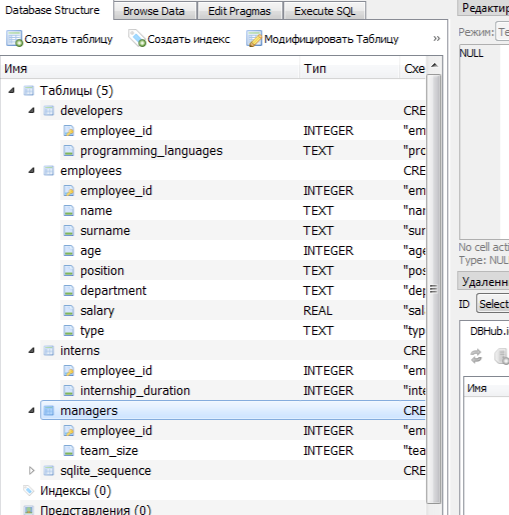

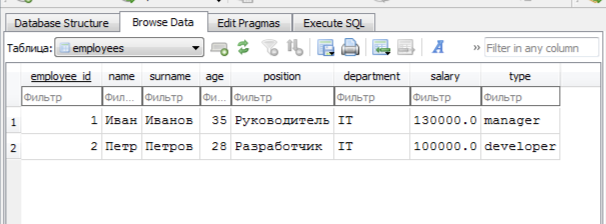

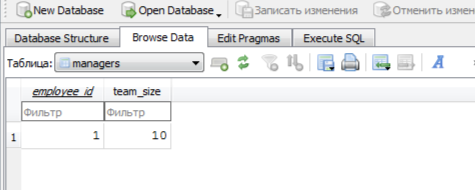